Extracting and Visualizing Stock Data


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install requests

In [ ]:
!pip install beautifulsoup4

In [ ]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup

In [ ]:
import json

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
 #Use yfinance to Extract Stock Data
Tesla=yf.Ticker("TSLA")

In [ ]:
#Get historical market data
Tesla_data = Tesla.history(period="max")

In [ ]:
# Print some info
Tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [ ]:
#Use Webscraping to Extract Tesla Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
print(soup)


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [ ]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [ ]:
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
print(tesla_revenue)

    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [ ]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
print(tesla_revenue.tail())

    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


Question 3: Use yfinance to Extract Stock Data

In [ ]:
 #Use yfinance to Extract Stock Data
Gamestop=yf.Ticker("GME")
Gamestop_data = Gamestop.history(period="max")
Gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Use Webscraping to Extract GME Revenue Data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
print(html_data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
print(soup)

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [ ]:
Gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [ ]:
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    Gamestop_revenue = pd.concat([Gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
print(Gamestop_revenue)

    Date Revenue
0   2020  $6,466
1   2019  $8,285
2   2018  $8,547
3   2017  $7,965
4   2016  $9,364
5   2015  $9,296
6   2014  $9,040
7   2013  $8,887
8   2012  $9,551
9   2011  $9,474
10  2010  $9,078
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


In [ ]:
Gamestop_revenue["Revenue"] = Gamestop_revenue['Revenue'].str.replace(',|\$',"")

In [ ]:
Gamestop_revenue.dropna(inplace=True)
Gamestop_revenue = Gamestop_revenue[Gamestop_revenue['Revenue'] != ""]

In [ ]:
print(Gamestop_revenue.tail())

    Date Revenue
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


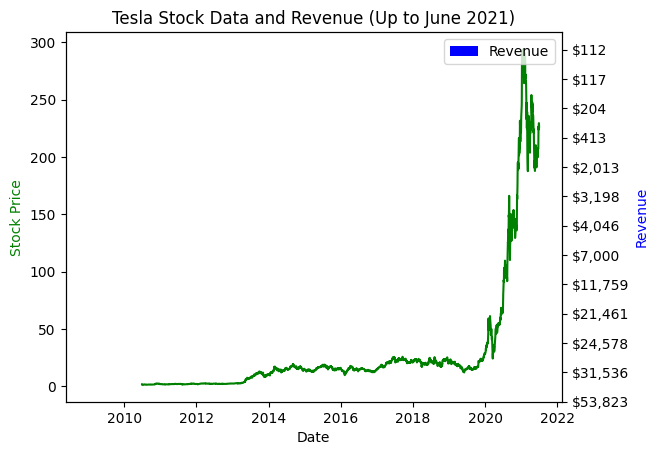

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    # Convert 'Date' column to datetime objects
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    # The error is occuring because Date is not a datetime object
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(stock_data['Close'], color='green', label='Stock Price')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='blue', label='Revenue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='g')
    ax2.set_ylabel("Revenue", color='b')
    plt.title(f'{stock} Stock Data and Revenue (Up to June 2021)')
    plt.legend()
    plt.show()

# Filter data up to June 2021
Tesla_data = Tesla_data[Tesla_data.index <= pd.to_datetime('2021-06-30').tz_localize('America/New_York')]

# Convert Date column to datetime in tesla_revenue DataFrame
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
# Filter tesla_revenue DataFrame by date
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= pd.to_datetime('2021-06-30')]

# Call the make_graph function
make_graph(Tesla_data, tesla_revenue, 'Tesla')

<ipython-input-65-9076edff44bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gamestop_data['Date'] = pd.to_datetime(revenue_data['Date'])


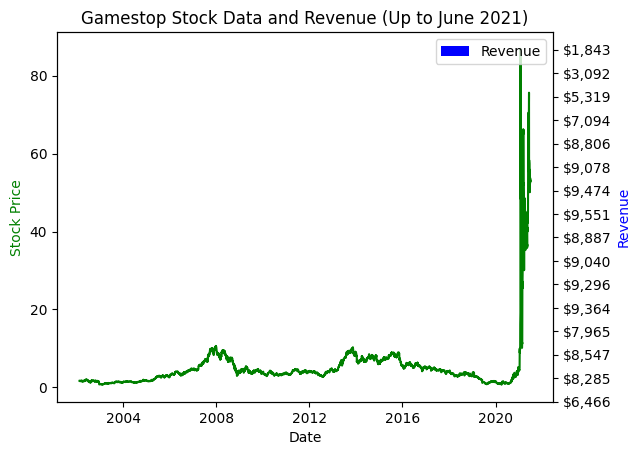

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    # Convert 'Date' column to datetime objects
    Gamestop_data['Date'] = pd.to_datetime(revenue_data['Date'])
    # The error is occuring because Date is not a datetime object
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(stock_data['Close'], color='green', label='Stock Price')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='blue', label='Revenue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='g')
    ax2.set_ylabel("Revenue", color='b')
    plt.title(f'{stock} Stock Data and Revenue (Up to June 2021)')
    plt.legend()
    plt.show()

# Filter data up to June 2021
Gamestop_data = Gamestop_data[Gamestop_data.index <= pd.to_datetime('2021-06-30').tz_localize('America/New_York')]

# Convert Date column to datetime in tesla_revenue DataFrame
Gamestop_revenue['Date'] = pd.to_datetime(Gamestop_revenue['Date'])
# Filter tesla_revenue DataFrame by date
Gamestop_revenue = Gamestop_revenue[Gamestop_revenue['Date'] <= pd.to_datetime('2021-06-30')]

# Call the make_graph function
make_graph(Gamestop_data, Gamestop_revenue, 'Gamestop')